<a href="https://colab.research.google.com/github/Giuppone/CelMech/blob/main/Ciclos_dbours_Dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculo de ciclos para "QS Vir", requiere el archivo Datos.txt

> Bloque con sangría
@ C. Giuppone . Reduccion de datos para detectar binarias . Con K. (K,e,w,t0,z0,P,t)   23/8/2021

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from math import *    #importa todas las operaciones matemáticas de math (sin, cos, tan, sqrt, pi, etc)
#import pandas
plt.style.use('default')

In [ ]:
# https://www.iau.org/public/themes/measuring/ 
uam     = 1.495978707e11
c       = 2.99792458e8/uam #m/s/uam == ua/s
twopi   = pi*2
dy     = 365.25
k      = 1.720209895e-02
G      = k*k
mearth = 3.04043e-6       # earth mass in solar masses
mjup   = 9.54792e-4       #pup in solar masses
rad    = twopi/360.0

In [ ]:
import os
# Let's determine the current directory and store it in a variable
# (execute this cell only once at the beginning)
# ayudas comandos: https://neptune.ai/blog/google-colab-dealing-with-files-2

from google.colab import drive
drive.mount('/content/drive')
cwd = os.getcwd()
cwd

Mounted at /content/drive


'/content'

In [ ]:
#drive dir
drive_dir = "/content/drive/MyDrive/QSvir2021"
os.chdir (drive_dir)
!ls

2pl.ipynb		     Ciclos-dbours-P.ipynb  Fig4-Bours2016.png
ae1.png			     compara.png	    OC.ipynb
ae2.png			     Datos.txt		    qsvir.dat
Ciclos-dbours-Dt_back.ipynb  Fig10-Bours2016.png    QSvir-k-fit-1pl.ipynb
Ciclos-dbours-Dt.ipynb	     Fig10-OCwithT.png


In [ ]:
# Leo el archivo con los datos 
Datos = np.loadtxt("Datos.txt")
#Datos = np.loadtxt("Datosr.txt")
# QS =pandas.read_csv('qsvir.dat', delim_whitespace=True)
EB = Datos[:,0] # Eclipses Bours
T =  Datos[:,1] # Tiempos de eclipse c/r al baricentro
ERR = Datos[:,2] # Error en los tiempos de eclipse
Obs = Datos[:,3] # Observador (leer Leyenda de Bours.txt para su comprensión)
# Por ej: obs[0]=1. => El "1" está asociado a "O’Donoghue et al. 2003"
E=EB
print (len(EB),'el Artículo Bours dice q son 110 datos')

105 el Artículo Bours dice q son 110 datos


In [ ]:
len(T)

105

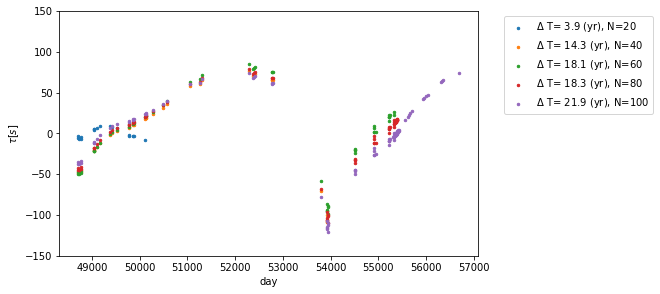

In [ ]:
plt.figure(figsize=(5*1.5,3*1.5))
secD = 24*60*60                # segundos en un día
plt.xlabel('day')
plt.ylabel(r'$\tau [s]$');
plt.ylim(-150,150)

ij =20
it =20
while ij<len(E):
    #TE = t0 + Porb*E
    x=E[0:ij]
    y=T[0:ij]
    p= np.polyfit(x, y, 1, rcond=None, full=False, w=None, cov=False)
    # p2=np.polyfit(x, y, 2, rcond=None, full=False, w=None, cov=False)
    # print (p[0],ij)
    deltaT = round((T[ij]-T[0])/365.25,1)
    tlabel = '$\Delta$ T= '+str(deltaT)+' (yr), N='+str(ij)
    plt.scatter(T[0:ij], (T[0:ij]-(p[1]+p[0]*E[0:ij]))*secD, s=6, label=tlabel)
    ij=ij+it

p= np.polyfit(E, T, 1, rcond=None, full=False, w=None, cov=False)
deltaT = round((T[len(T)-1]-T[0])/365.25,1)
tlabel = '$\Delta$ T= '+str(deltaT)+' (yr), N='+str(len(E))

# plt.scatter(T, (T-(p[1]+p[0]*E))*secD, s=6, cmap='jet', label=tlabel)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('Fig10-OCwithT.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


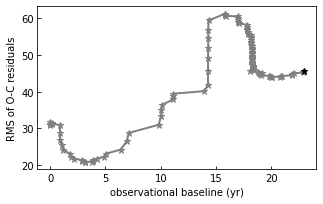

In [ ]:
OC = (T-(p[1]+p[0]*E))*secD
OCs = np.zeros(len(OC))
ij =0 
while ij<len(OC):
#     print (np.sqrt(np.sum(OC[0:ij]*OC[0:ij])))
    OCs[ij] = np.sqrt(OC[0:ij].dot(OC[0:ij])/(ij*1.))
    # print (ij, OC[ij],OCs[ij])
    ij=ij+1
    # plt.plot((T-T[0])/365.25, OCs, 'go--', linewidth=2, markersize=12)
plt.figure(figsize=(5,3))
plt.plot((T-T[0])/365.25, OCs, color='gray', marker='*', linestyle='-', linewidth=2, markersize=7)
plt.plot((T[len(T)-1]-T[0])/365.25, OCs[len(T)-1], color='black', marker='*', linestyle='-', linewidth=2, markersize=7)
plt.ylabel(r'RMS of O-C residuals')
plt.xlabel('observational baseline (yr)' )
# plt.ylim(0.3,400)
# plt.yscale('log')
plt.tick_params(direction='in', axis='both')
plt.savefig('Fig4-Bours2016.png')

In [ ]:
#Funciones auxiliares
#anomalía eccéntrica
def ae(e,M):
    E = M #Valor inicial para iteración
    i = 0
    while True:
        E0 = E
        E = M + e*np.sin(E0)
        i = i+1
        D = np.abs(E-E0)
        if ((D<0.0001).all()):   #cg 24/8

            return E #np.necesario
            break
#Anomalía verdadera:  Tan(F/2) = ee*Tan(E/2) #giuppone
def F(e,M):
    ee=np.sqrt((1+e)/(1-e))
    
    ss = sqrt(1. + e)*np.sin(ae(e,M)/2.)
    cs = sqrt(1. - e)*np.cos(ae(e,M)/2.)
    F   = 2*np.arctan2(ss,cs)   #anomalía verdadera en cuadrante correcto   #np.necesario
    return F         


In [ ]:
def tau(K,e,w,t0,z0,P,t):  #k in secs #P in years #z0 in secs #Mp enters in jupiter masses
# el orden de las variables debe ser K,e,w,t0,z0,P
    n    = 2*pi/(P*365.25)
    M    = n*(t-t0)
    f    = F(e,M)
    z    = K*(1-e**2)/(1+e*cos(f))*sin(f+w)   # K=a*sin(inc)*mp/(me+mp)  #el c está transformado en ua/s, para q z de en s
    tau=z+z0
    return tau

In [ ]:
def taug(K,e,w,t0,z0,P,t):  #k in secs #P in years #z0 in secs #Mp enters in jupiter masses
# el orden de las variables debe ser K,e,w,t0,z0,P
    n    = 2*pi/(P*365.25)
    M     = n*(t-t0)
    aE    = ae(e,M)

    z  = K*(sin(w)*(cos(aE)-e)+cos(w)*sqrt(1-e*e)*sin(aE))  # K=a/c*sin(inc)*mp/(me+mp)  #K en seg, el c está transformado en ua/s, para q z de en s
    tau=z+z0
    return tau

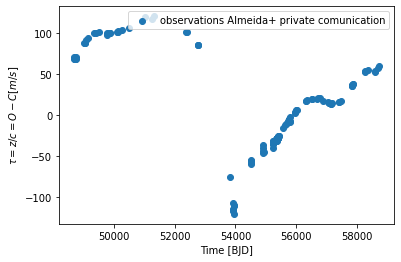

In [ ]:
# Grafico Tiempos de eclipse vs ciclos
#plt.scatter(times,z[1]/c*mp/(m0+m1+mp), label='n-body')
data =np.loadtxt('qsvir.dat',usecols=(1,2,3))
tr    = data[:,0]   #time  #no cambiar el origen de tiempo
taur  = data[:,1]
etaur = data[:,2]

plt.scatter(tr,taur, label='observations Almeida+ private comunication')
#plt.plot(times*1.3,(z[1]/c*mp/(m0+m1+mp))*1.5-90, label='n-body corrected')
#plt.xlim(0,7000)
plt.xlabel('Time [BJD]')
#plt.ylim(-30,141)
plt.ylabel(r'$\tau=z/c = O-C [m/s]$')
plt.legend()
plt.show()

In [ ]:
#Construct syntethic curves
def synt(Params):    #genera una curva de "z" de 1000 puntos con params
# el orden de las variables debe ser K,e,w,t0,z0,P
    K,e,w,t0,z0,P = Params
    Zsy =[]   #velocidad radial sintética (genero una curva continua sin errores)
    Tsy =[]
    nf=1000
    delta=max(t)-min(t)
    ij=0
    while ij < nf:
        tsy=min(t)+delta*ij/nf
        Zsy.append(tau(K,e,w,t0,z0,P,tsy))
        Tsy.append(tsy)
        ij = ij+1
    return Tsy,Zsy   

def OC(Params):    #genera una curva de OC con params
    K,e,w,t0,z0,P = Params
# el orden de las variables debe ser K,e,w,t0,z0,P
    BOC   =[]
    TOC   =[] 
    ij=0
    while ij < len(t):
        BOC.append(tau(K,e,w,t0,z0,P,t=t[ij]))
        TOC.append(t[ij])
        ij = ij+1
    return TOC,BOC    

In [ ]:
#Generate synt
m0=0.78
m1=0.43
Me=m0+m1   #no se necesita Me hasta no calcular los secundarios, pero para generar una curva real SI

Mp  =52.7*mjup  #en msun
P   =18.96      #years    #uno de los tantos valores de la literatura
n   = 2*pi/(P*365.25)
a   = (G*(Me+Mp)/(n**2))**(1./3.) #3ra kepler
inc = 76.5

K = a*sin(inc*rad)*Mp/(Me+Mp)/c  # K=a*sin(inc)*mp/(me+mp) , asumiendo inc del sistema binario 78.5 Latkovic

print ("a (au)= ", a,inc,mjup,"K (seg)= ", K)
ep =0.95
w  = 206*rad
T0 = 53831
z0 = 0. 
t  = tr 

print(T0,t[0],min(t),max(t))

a (au)=  7.680333532161485 76.5 0.000954792 K (seg)=  148.7838224704055
53831 48715.419887605 48715.419887605 58706.421355722


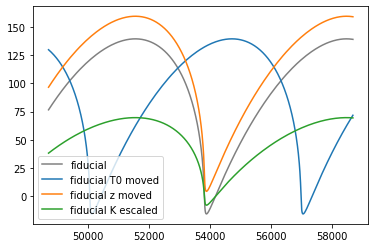

In [ ]:
  #ainc,e,w,t0,z0,P 
ep =0.95
w  = 206*rad
### parámetros y generación de sintéticas
Params = K,ep,w,T0,z0,P
tsy0,zsy0 = synt(Params)
Params = K,ep,w,57000.,z0,P
tsy1,zsy1 = synt(Params)
Params = K,ep,w,T0,20,P
tsy2,zsy2 = synt(Params)
Params = 0.5*K,ep,w,T0,z0,P
tsy3,zsy3 = synt(Params)

## ploteo de los datos sintéticos
#the amplitude does not change with T0
plt.plot(tsy0,zsy0, label='fiducial', c='gray')
plt.plot(tsy1,zsy1, label='fiducial T0 moved')
plt.plot(tsy2,zsy2, label='fiducial z moved')
plt.plot(tsy3,zsy3, label='fiducial K escaled')

plt.legend()
plt.savefig('ae2.png',dpi=300)

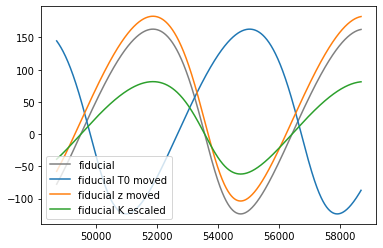

In [ ]:
ep =0.3
w  = 206*rad
### parámetros y generación de sintéticas
Params = K,ep,w,T0,z0,P
tsy0,zsy0 = synt(Params)
Params = K,ep,w,57000.,z0,P
tsy1,zsy1 = synt(Params)
Params = K,ep,w,T0,20,P
tsy2,zsy2 = synt(Params)
Params = 0.5*K,ep,w,T0,z0,P
tsy3,zsy3 = synt(Params)

## ploteo de los datos sintéticos
#the amplitude does not change with T0
plt.plot(tsy0,zsy0, label='fiducial', c='gray')
plt.plot(tsy1,zsy1, label='fiducial T0 moved')
plt.plot(tsy2,zsy2, label='fiducial z moved')
plt.plot(tsy3,zsy3, label='fiducial K escaled')

plt.legend()
plt.savefig('ae1.png',dpi=300)

Time:  0.016073293999966154
Time:  0.01782849599999281


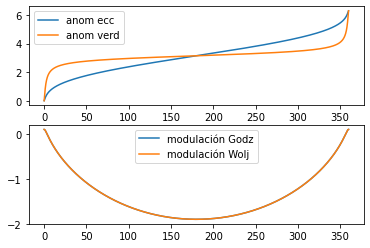

In [ ]:
import timeit
M = np.arange(0,360,0.001)*rad
e =0.9
E = M #Valor inicial para iteración
i = 0
w=90*rad
aE    = ae(e,M)
f     = F(e,M)

start = timeit.default_timer()
taug= (np.sin(w)*(np.cos(aE)-e)+np.cos(w)*np.sqrt(1-e*e)*np.sin(aE))  # K=a/c*sin(inc)*mp/(me+mp)  #K en seg, el c está transformado en ua/s, para q z de en s
stop = timeit.default_timer()

print('Time: ', stop - start)  

start = timeit.default_timer()
tauw= (1-e**2)/(1+e*np.cos(f))*np.sin(f+w) 
stop = timeit.default_timer()

print('Time: ', stop - start)  

plt.subplot(2,1,1)
plt.plot(M/rad,aE,label='anom ecc')
plt.plot(M/rad,f,label='anom verd')
plt.legend()

plt.subplot(2,1,2)
plt.plot(M/rad,taug,label='modulación Godz')
plt.plot(M/rad,tauw,label='modulación Wolj')
plt.legend()


In [ ]:
#Defino una WRMS que dependa de una sóla variable (que será un arreglo) (así funciona el minimizador)
#Los DATOS que tengo son: t, taur, etaur
#K,ep,w,T0,z0,P = Params

# K = a*sin(inc*rad)*Mp/(Me+Mp)/c  # K=a*sin(inc)*mp/(me+mp) , asumiendo inc del sistema binario 78.5 Latkovic
   
#bounds = ((aincm,aincmax), (emin,emax), (wmin, wmax), (t0min,t0max), (z0min,z0max), (Pmin,Pmax))
def WRMS(Params):

#    print (Params)
#    print (bounds)
    for x,r in zip(Params,bounds):    #el comando junta los datos de Params y bounds
        if x < r[0] or x > r[1]:      #si los params son mayores o menores q los bounds retorna infinito 
      #      print (x,r[0],r[1])
            return np.inf
        
    K,e,w,t0,z0,P = Params    #Arreglo a minimizar
    Be=taur
     
#    print(taur[0:2],t[0:2])
    VT=[]
    ij = 0
    while ij<len(Be):
        VT.append(tau(K,e,w,t0,z0,P,t=t[ij]))
        ij = ij + 1
        
    N =len(Be)
    err   = etaur #np.sqrt(ei**2+sj**2)
    invS  =np.sum(1./err**2)
    Ab    =invS/N/(N-1.)

    WRMS=Ab*np.sum((( VT - Be)/err)**2.)
    return np.sqrt(WRMS)  

def nWRMS(Params):
    wi=WRMS(Params)
    N =len(taur)
    w2=wi*N*(N-1)
    return -0.5*w2

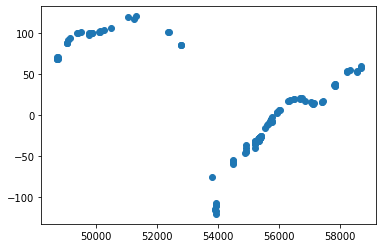

In [ ]:
plt.scatter(t,taur)

In [ ]:
K =  148.7838224704055 #initial guess
Params = K,0.95,206*rad,T0,0.,18.96
# bounds = ((Kmin,Kmax), (emin,emax), (wmin, wmax), (t0min,t0max), (z0min,z0max), (Pmin,Pmax))
Pmin=(t[2]-t[0])/dy
Pmax=(max(t)-min(t))/dy   #in years
t0min = min(t)
t0max = max(t)
z0min = min(taur)
z0max = max(taur)
Kmin  = 3  # usar definición del teórico K
Kmax  = max(taur)-min(taur) # usar definición del teórico K
bounds = (Kmin,Kmax), (0,0.99), (0, 2*pi), (t0min,t0max), (z0min,z0max), (Pmin,Pmax)
bounds = (Kmin,Kmax), (0,0.99), (0, 2*pi), (t0min,t0max), (z0min,z0max), (15.,30.)
# WRMS(Params)
print (bounds)
print (Params)

((3, 240.19319463987), (0, 0.99), (0, 6.283185307179586), (48715.419887605, 58706.421355722), (-119.99747701921, 120.19571762066), (15.0, 30.0))
(148.7838224704055, 0.95, 3.595378259108319, 53831, 0.0, 18.96)


In [ ]:
WRMS(Params)

959.0847285121271

In [ ]:
%%time
import scipy.optimize as optimize
#Minimize # genetics algorithm. No necesita condicion inicial...sólo bounds!
resultga0 = optimize.differential_evolution(WRMS, bounds, strategy='best1bin', maxiter=95, popsize=80,tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=True, polish=True, init='latinhypercube', atol=0)   #disp=True si queremos ver como avanza.
resultga0.x

differential_evolution step 1: f(x)= 128.717
differential_evolution step 2: f(x)= 128.717
differential_evolution step 3: f(x)= 120.546
differential_evolution step 4: f(x)= 120.546
differential_evolution step 5: f(x)= 120.546
differential_evolution step 6: f(x)= 116.948
differential_evolution step 7: f(x)= 116.948
differential_evolution step 8: f(x)= 116.948
differential_evolution step 9: f(x)= 116.948
differential_evolution step 10: f(x)= 113.48
differential_evolution step 11: f(x)= 113.48
differential_evolution step 12: f(x)= 113.48
differential_evolution step 13: f(x)= 113.48
differential_evolution step 14: f(x)= 110.674
differential_evolution step 15: f(x)= 102.099
differential_evolution step 16: f(x)= 102.099
differential_evolution step 17: f(x)= 102.099
differential_evolution step 18: f(x)= 102.099
differential_evolution step 19: f(x)= 102.099
differential_evolution step 20: f(x)= 102.099
differential_evolution step 21: f(x)= 97.4184
differential_evolution step 22: f(x)= 94.4081
d

In [ ]:
%%time
import scipy.optimize as optimize
# xrand = (np.random.uniform(Mpmax,Mpmin),np.random.uniform(0,0.95),)
xrand = (np.random.uniform(Kmin,Kmax),np.random.uniform(0,0.95),np.random.uniform(0,2*pi),np.random.uniform(t0min,t0max),np.random.uniform(z0min,z0max), np.random.uniform(15.,30.))
resultsimp2 = optimize.minimize(WRMS, xrand, method='nelder-mead', options={'xatol': 1e-8, 'disp': True, 'maxiter':200000})   #disp=True si queremos ver como avanza.

Optimization terminated successfully.
         Current function value: 80.713835
         Iterations: 1370
         Function evaluations: 2285
CPU times: user 56.4 s, sys: 159 ms, total: 56.6 s
Wall time: 56.7 s


In [ ]:
%%time
Nfeval = 1
def callbackF(Xi):
    global Nfeval
    if Nfeval % 20 == 0:
      print (Nfeval, Xi[1], WRMS(Xi))
    Nfeval += 1
    
result = optimize.minimize(WRMS, resultga0.x, method='Nelder-Mead', tol=1e-10, callback=callbackF)
#result = optimize.minimize(WRMS, xrand, method='Nelder-Mead', tol=1e-10, callback=callbackF)


20 0.9329667845083969 78.19978282493986
40 0.9325246882447806 78.13800052765542
60 0.9320161774541083 78.07311032561601
80 0.9296382205668805 77.95277994514218
100 0.9295607851106167 77.91922108292181
120 0.9299254015813467 77.9038174414599
140 0.9299233638618536 77.90283782473763
160 0.9299436168311082 77.9019561744671
180 0.9301161092860064 77.90067790505918
200 0.9301390805877889 77.89935192044791
220 0.9301264323406819 77.89757302879933
240 0.9301029361957536 77.89605641268578
260 0.9299858398464345 77.89023623253836
280 0.929984446947726 77.88906227563936
300 0.929970015063744 77.88888493905269
320 0.9299225627045176 77.88860902261503
340 0.9299015204531729 77.88854130948995
360 0.9299065901891859 77.88853179051081
380 0.9299068794230527 77.88852707215663
400 0.9299049118197542 77.88852673293336
420 0.9299060265654471 77.8885263353285
440 0.9299062708072013 77.88852625659949
460 0.9299063009660671 77.88852591820685
480 0.9299064025120864 77.8885258455939
500 0.9299064557980972 77.

In [ ]:
%%time
Nfeval = 1
def callbackF(Xi):
    global Nfeval
    if Nfeval % 20 == 0:
      print (Nfeval, Xi[1], WRMS(Xi))
    Nfeval += 1
    
resultrand = optimize.minimize(WRMS, xrand, method='Nelder-Mead', tol=1e-10, callback=callbackF)

20 0.5386753294463443 315.80758584181734
40 0.5663209791893229 287.16255601729847
60 0.6033024560359077 269.19245745361786
80 0.6102937388831533 247.31970192997306
100 0.6671464345634674 187.03521097936388
120 0.7101666959548865 169.39769826310052
140 0.7116143626329074 162.21479525777713
160 0.6702868315930786 139.8392480001377
180 0.6770508234466048 130.46352083610276
200 0.6832426169797063 125.16894386991274
220 0.6990031971656916 122.18457810633357
240 0.7360800677167765 120.84661975912346
260 0.7347194120224199 115.27208319231535
280 0.7375803062481123 110.75516743114875
300 0.7267583406809306 108.02403133772677
320 0.7394289361906625 105.0565536697898
340 0.7104706604950866 96.93390625097813
360 0.7207203663314545 94.26620659753831
380 0.7207691093668314 92.0869010806242
400 0.734130172016902 90.78200162401579
420 0.7369994179982653 90.3168818224947
440 0.759117266972146 86.95914263050014
460 0.763796696674949 85.49047461516706
480 0.7859334174323305 82.73278946053357
500 0.79347

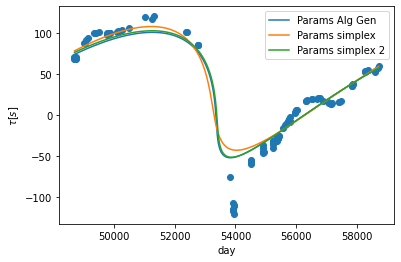

In [ ]:
tga,  tauga       = synt(resultga0.x)
tgass,taugass     = synt(resultsimp2.x)
tcallb,taucallb     = synt(result.x)

plt.xlabel('day')
plt.ylabel(r'$\tau [s]$');
plt.savefig('Fig10-Bours2016.png')
plt.plot(tga  ,tauga,   label="Params Alg Gen")
plt.plot(tgass,taugass, label="Params simplex")
plt.plot(tcallb,taucallb, label="Params simplex 2")
plt.scatter(t,taur)
plt.legend()

In [ ]:
print('Algoritmos', *resultga0.x)
print('Simplex',  *result.x)


Algoritmos 191.25783973199225 0.9329667845083969 3.325771819780579 53375.321259695 -8.238676419549583 29.67741995753024
Simplex 188.48383169651643 0.9299065008142358 3.3318420581535753 53405.5364700471 -7.40864887938889 29.999999999999744


In [ ]:
# Obtengo O-C 
plt.figure(figsize=(5,3))
secD = 24*60*60                # segundos en un día
plt.scatter(T, (T-(p[1]+p[0]*E))*secD, s=6, c=Obs, cmap='jet')
#plt.title('O-C', fontsize=20)

ValueError: ignored

<Figure size 360x216 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(6,4.5))
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.6   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

xlin = np.arange(0,360,1)
ylin = np.sin(xlin*rad)

fig.tight_layout()
# plt.xscale('log')
plt.subplot(2,3,1)
plt.scatter(xlin,ylin)

plt.subplot(2,3,2)
plt.scatter(xlin,ylin)

plt.subplot(2,3,3)
plt.scatter(xlin,ylin)


plt.subplot(2,3,4)
plt.scatter(xlin,ylin)


plt.subplot(2,3,5)
plt.scatter(xlin,ylin)


plt.subplot(2,3,6)
plt.scatter(xlin,ylin)

